In [5]:
%load_ext autoreload
%autoreload 2

import models
import compute
import analysis

import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model

## Symmetric model

['000', '001', '010', '011', '111', '110', '101', '100']


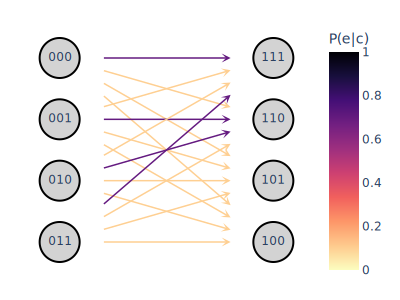

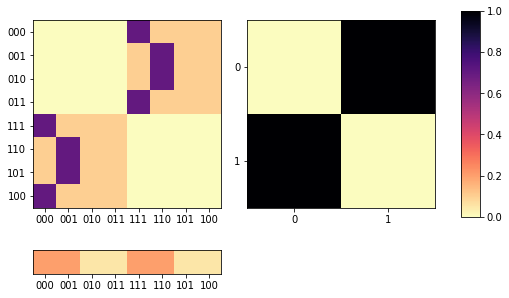

In [4]:
model_det = 0.6
model_deg = 0.5
n_states = 8
asymmetry = 0

colormap='magma_r'
micro_tpm, micro_states, (A_states, B_states) = models.create_bipartite_micro_tpm(model_det, model_deg, n_states, asymmetry, state_labels='mirror')
print(micro_states)
macro_tpm, macro_states = models.create_bipartite_macro_tpm()
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = False,
                            width=400, height=300, renderer='svg', colormap=colormap,
                            node_color='lightgray', node_size=40, rho_arrow=0.6, arrowwidth=1.5);

fig = models.plot_tpm_matrices(micro_tpm, micro_states, macro_tpm, macro_states, colormap=colormap)

# fig.write_image(Path.cwd()/f'docs/figures/model_diagram_deg_{model_deg:.1f}_det_{model_det:.1f}_{colormap}.svg')
# plt.savefig(Path.cwd()/f'docs/figures/model_tpm_deg_{model_deg:.1f}_det_{model_det:.1f}_{colormap}.eps', dpi=200)

## Asymmetric model

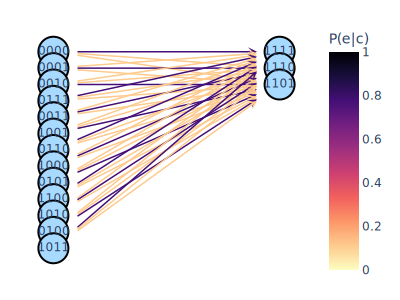

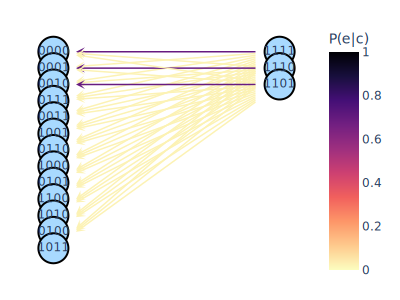

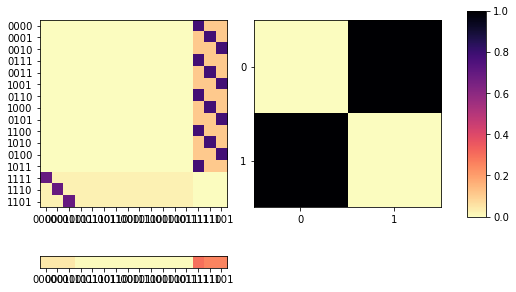

In [6]:
model_det = 2/3
model_deg = 0.7
model_deg = 0
n_states = 16
asymmetry = 0.7

colormap='magma_r'
micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states, asymmetry, state_labels='mirror')
macro_tpm, macro_states = models.create_macro_tpm()
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = False,
                            width=400, height=300, renderer='svg', colormap=colormap);
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = True,
                            width=400, height=300, renderer='svg', colormap=colormap);
models.plot_tpm_matrices(micro_tpm, micro_states, macro_tpm, macro_states, colormap=colormap)

[0, 1, 2, 3, 4, 5] [6, 7]


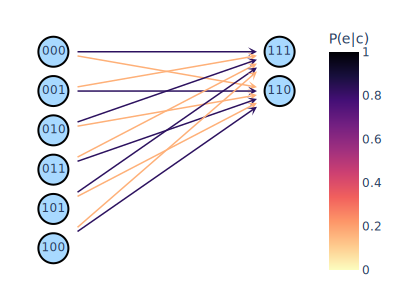

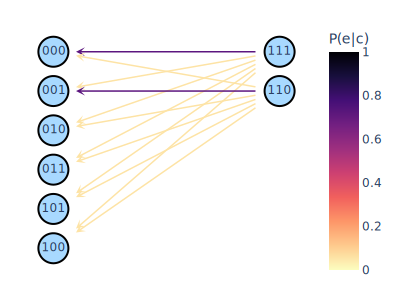

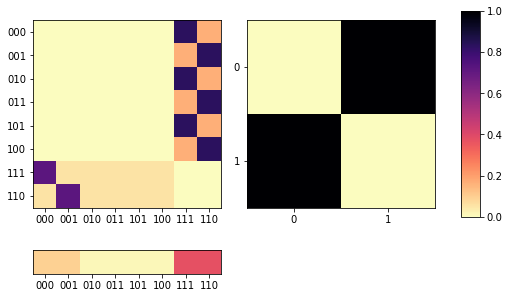

In [150]:
model_det = 2/3
model_deg = 0.7
model_deg = 0
n_states = 8
asymmetry = 0.8

colormap='magma_r'
micro_tpm, micro_states, (A_states, B_states) = models.create_micro_tpm(model_det, model_deg, n_states, asymmetry, state_labels='mirror')
macro_tpm, macro_states = models.create_macro_tpm()
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = False,
                            width=400, height=300, renderer='svg', colormap=colormap);
fig = models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, flip_direction = True,
                            width=400, height=300, renderer='svg', colormap=colormap);
models.plot_tpm_matrices(micro_tpm, micro_states, macro_tpm, macro_states, colormap=colormap)

## Degeneracy algorithm

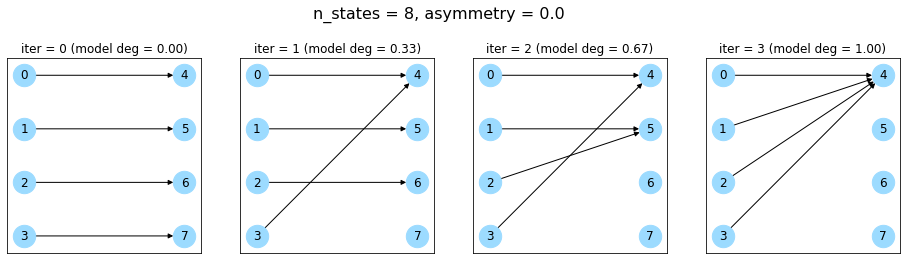

In [3]:
n_states = 8
asymmetry = 0
models.plot_degeneracy_algorithm(n_states, asymmetry)
# plt.savefig(FIGURE_DIR/"FigS3_degeneracy_algorithm.eps")

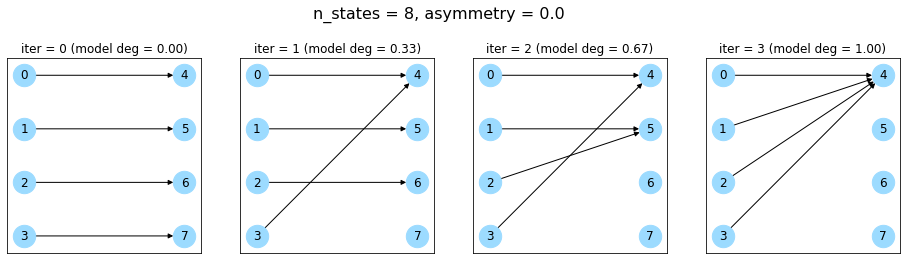

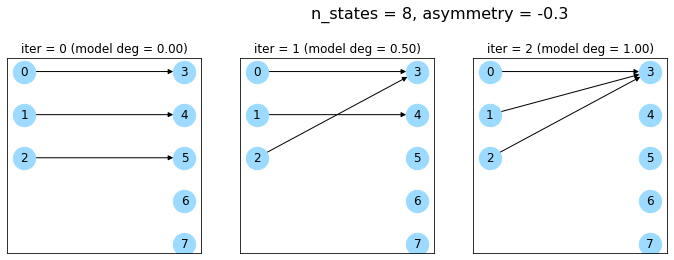

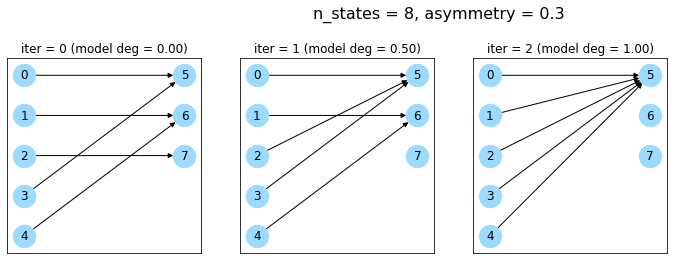

In [4]:
n_states = 8
asymmetry = 0
models.plot_degeneracy_algorithm(n_states, asymmetry)
asymmetry = -0.3
models.plot_degeneracy_algorithm(n_states, asymmetry)
asymmetry = 0.3
models.plot_degeneracy_algorithm(n_states, asymmetry)

# Analysis

## Toy system (8 states)

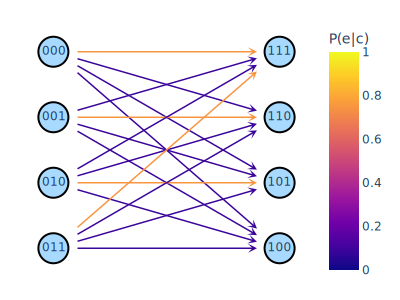

Parameters
Micro transition: (000) --> (100)
Macro transition: (0) --> (1)

Micro
Input distribution: 'stationary'
Macro
Input distribution: 'stationary'


Probabilities
P(s)                 = ['0.21', '0.12', '0.13', '0.04', '0.21', '0.13', '0.13', '0.04'] => [0.5 0.5]
States(s)            = ['000', '001', '010', '011', '111', '110', '101', '100'] => ['0', '1']

P(not-c)             = ['0.16', '0.16', '0.05', '0.26', '0.16', '0.16', '0.05'] => [1.]
Not-c States(s)      = ['010', '100', '111', '001', '101', '110', '011'] => ['1']

P(e | c)             = 0.0833 => 1.00
P(e | {c})           = 0.0417 => 0.50
P(e | {not-c})       = 0.0307 => 0.00

CS_Eells (PNS)       = 0.053 => 1.00
CS_Lewis (PN)        = 0.632 => 1.00
CS_Cheng (PS)        = 0.054 => 1.00
CS_Suppes            = 0.042 => 0.50
CS_Good              = 0.056 => inf
CS_Effect_Info       = 1.000 => 1.00

Lewis_CPW state      = ['010', '100', '001'] => ['1']
P(e | not-c CPW)     = 0.056 => 0.00
CS_Lewis_CPW         = 0.333 => 1.0

In [8]:
which_input_dist = 'stationary' # 'maxent' or 'stationary'

model_det = 2/3
model_deg = 0.3

micro_transition = ['000', '100']
macro_transition = ['0', '1']
n_states = 8

micro_tpm, micro_states, (A_states, B_states) = models.create_bipartite_micro_tpm(model_det, model_deg, n_states=n_states, asymmetry=0, state_labels='mirror')
macro_tpm, macro_states = models.create_bipartite_macro_tpm()

models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, width=400, height=300, renderer='svg');

micro_out = compute.calc_measures(micro_tpm, micro_states, micro_transition, which_input_dist)
macro_out = compute.calc_measures(macro_tpm, macro_states, macro_transition, which_input_dist)

analysis.print_measures_output(micro_out, macro_out)

# print()
# print('Average\n=======')
# micro_out = calc_measures_average_transition(micro_tpm, micro_states, which_cause_purview, which_input_dist, A_states=A_states)
# for stat, value in micro_out.items():
#     print(f"{stat} : {value:.2f}")

## Paper system (16 states)

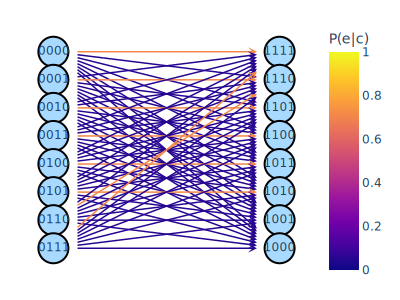

##########
STATIONARY
##########
Parameters
Micro transition: (0000) --> (1100)
Macro transition: (0) --> (1)

Micro
Input distribution: 'stationary'
Macro
Input distribution: 'stationary'


Probabilities
P(s)                 = ['0.10', '0.10', '0.06', '0.06', '0.06', '0.06', '0.02', '0.02', '0.10', '0.10', '0.06', '0.06', '0.06', '0.06', '0.02', '0.02'] => [0.5 0.5]
States(s)            = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1111', '1110', '1101', '1100', '1011', '1010', '1001', '1000'] => ['0', '1']

P(not-c)             = ['0.12', '0.07', '0.07', '0.07', '0.07', '0.02', '0.02', '0.12', '0.12', '0.07', '0.07', '0.07', '0.07', '0.02', '0.02'] => [1.]
Not-c States(s)      = ['0011', '0101', '0110', '1110', '0001', '1001', '0111', '1100', '1000', '0100', '1101', '1111', '1011', '0010', '1010'] => ['1']

P(e | c)             = 0.0417 => 1.00
P(e | {c})           = 0.0625 => 0.50
P(e | {not-c})       = 0.0649 => 0.00

CS_Eells (PNS)       = -0.023 => 1.00
CS_L

In [2]:
state_labels='mirror'

model_det = 2/3
model_deg = 0.3

micro_transition = ['0000', '1100']
# micro_transition = ['0000', '1111']

macro_transition = ['0', '1']
n_states = 16

micro_tpm, micro_states, (A_states, B_states) = models.create_bipartite_micro_tpm(model_det, model_deg, n_states=n_states, asymmetry=0, state_labels=state_labels)
macro_tpm, macro_states = models.create_bipartite_macro_tpm()

models.plot_tpm_graph(micro_tpm, micro_states, A_states, B_states, width=400, height=300, renderer='svg');

which_input_dist = 'stationary' # 'maxent' or 'stationary'

for which_input_dist in ['stationary', 'maxent', 'perturb']:
    print('##########')
    print(which_input_dist.upper())
    print('##########')
    micro_out = compute.calc_measures(micro_tpm, micro_states, micro_transition, which_input_dist)
    macro_out = compute.calc_measures(macro_tpm, macro_states, macro_transition, which_input_dist)

    analysis.print_measures_output(micro_out, macro_out)
    print()

# print()
# print('Average\n=======')
# micro_out = calc_measures_average_transition(micro_tpm, micro_states, which_cause_purview, which_input_dist, A_states=A_states)
# for stat, value in micro_out.items():
#     print(f"{stat} : {value:.2f}")

# [0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1111, 1110, 1101, 1100, 1011, 1010, 1001, 1000

## Testing different transitions

In [11]:
n_states = 16
state_labels = 'mirror'

which_input_dist = 'maxent'

micro_transition_main = ['0000', '1111']
micro_transition_nonmain = ['0000', '1100'] # nicer results in general
micro_transition_nonmain2 = ['0010', '1111'] # nicer results for Lewis CPW, but counterintuitive
micro_transition_nonmain3 = ['0000', '1110']

macro_transition = ['0', '1']

all_results = {}

# SINGLE TRANSITIONS
print('SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS')

for micro_transition, transition_type in zip([micro_transition_main, micro_transition_nonmain, micro_transition_nonmain2, micro_transition_nonmain3],
                            ['main', 'nonmain', 'nonmain2', 'nonmain3']):
    for input_dist in ['maxent', 'perturb', 'stationary']:
    
        results = analysis.run_analysis_02(n_states, 'single', which_input_dist=input_dist, 
                                        micro_transition=micro_transition, macro_transition=macro_transition,
                                        state_labels=state_labels, asymmetry=0)

        all_results[input_dist + '_single_' + transition_type] = results


SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS


2022-05-25 10:04:48,482 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,484 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,485 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,492 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,497 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,498 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,500 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,507 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:48,513 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:04:49,525 [matplotlib.text] WARNING MainProcess: posx and posy should be fini

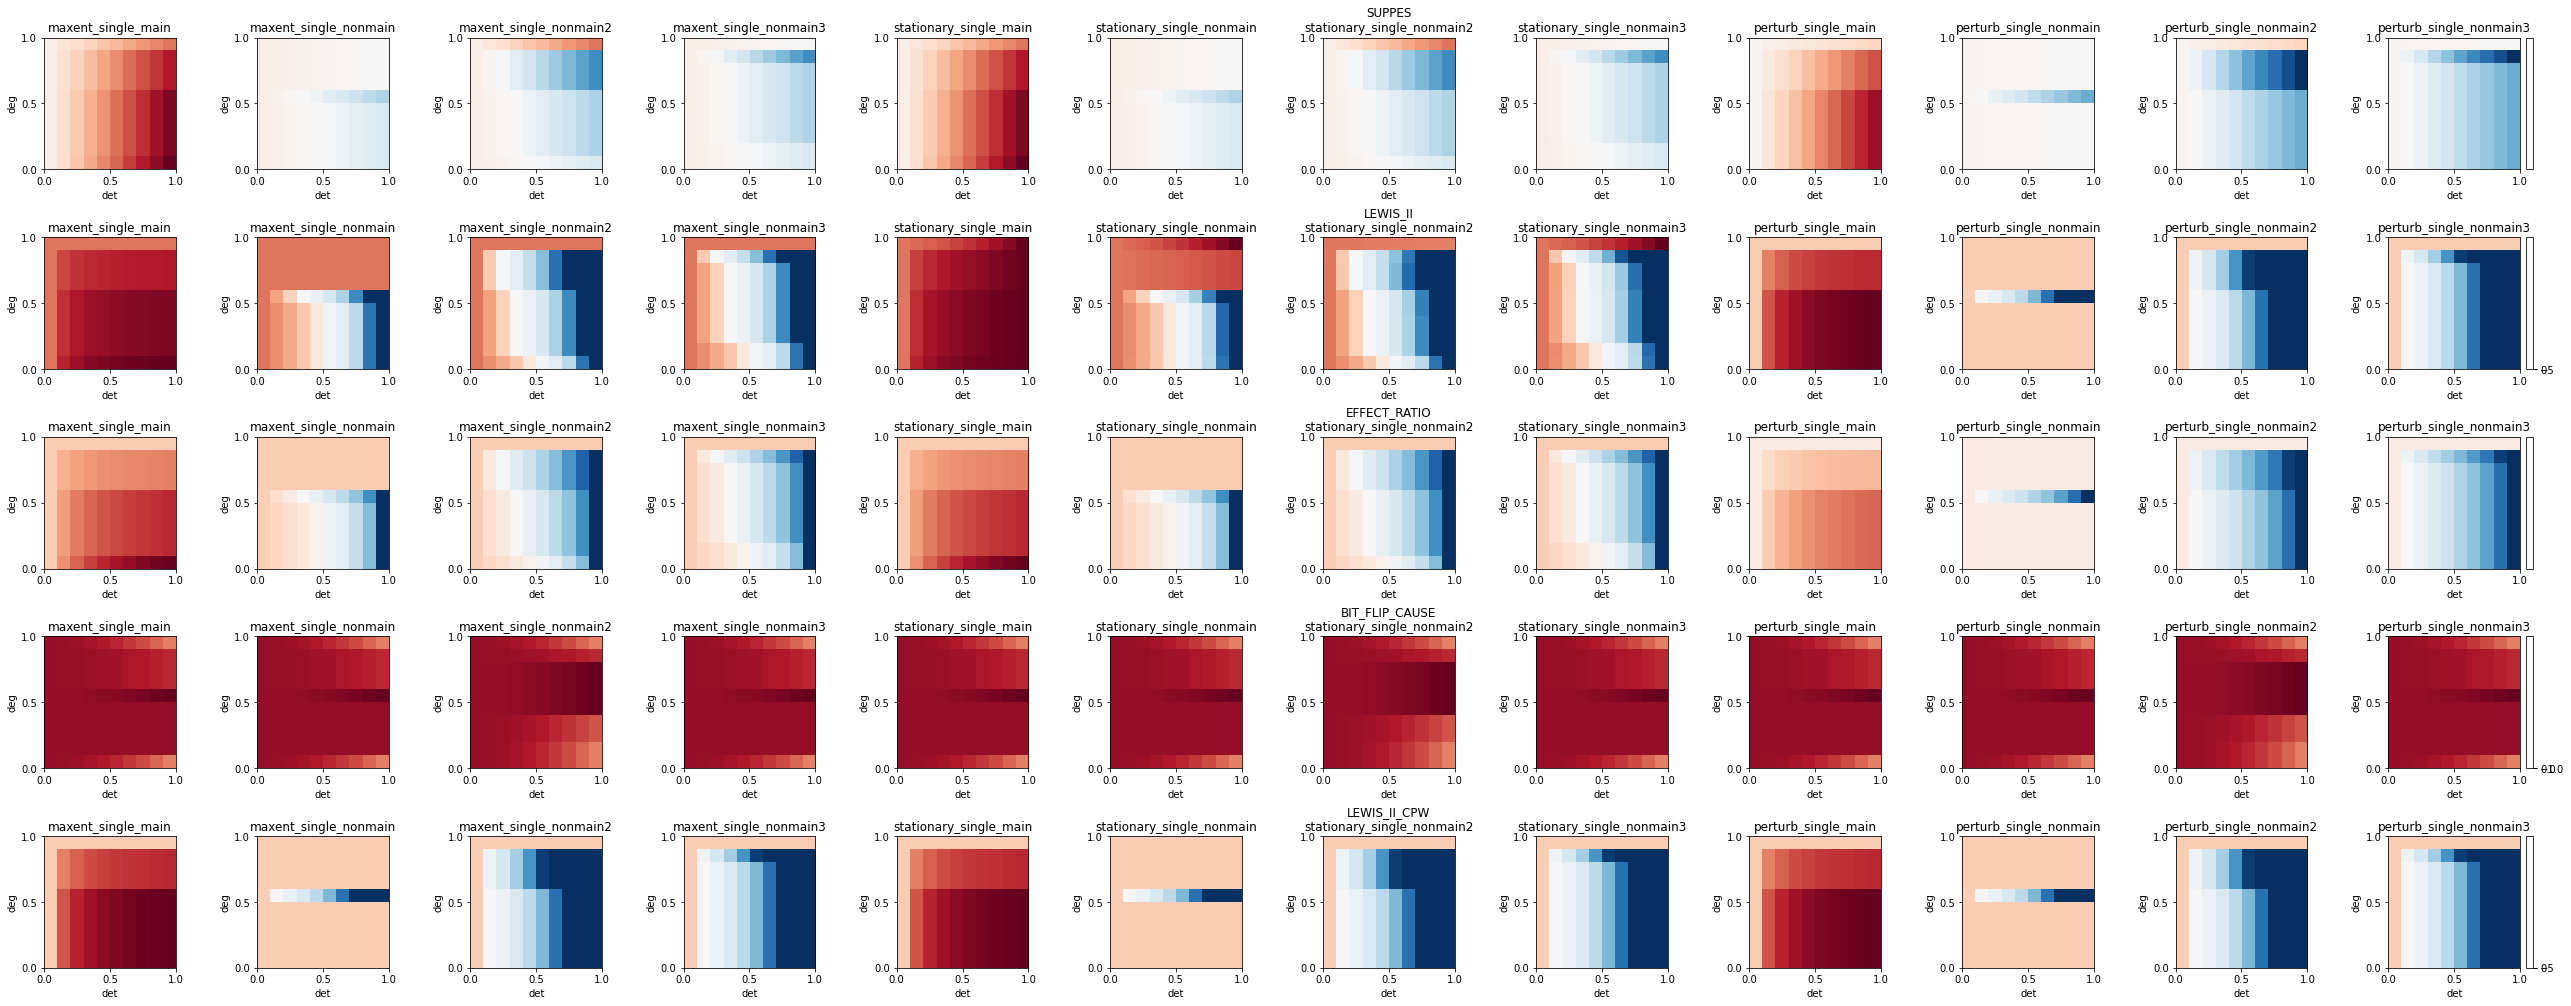

In [12]:
which_measures = ['suppes', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'lewis_II_cpw']

which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_single_nonmain2', 'maxent_single_nonmain3'] + \
                ['stationary_single_main', 'stationary_single_nonmain', 'stationary_single_nonmain2', 'stationary_single_nonmain3'] + \
                ['perturb_single_main', 'perturb_single_nonmain', 'perturb_single_nonmain2', 'perturb_single_nonmain3']

fig, axs = analysis.plot_analysis_by_result_02(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=False, no_labels=False, colormap='RdBu_r')
# plt.subplots_adjust(wspace=0.12, hspace=0.15)
# plt.savefig(Path.cwd()/f'docs/figures/fig3_causal_measures_RdBu.eps')

# Multiple transitions across model parameters

## Run analysis

In [83]:
analysis.run_all_analysis_02()

SYMMETRIC MODEL - SINGLE TRANSITION ANALYSIS
maxent ['0000', '1111']
Substituting 100 infinite values for 10 (for plotting) in good measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio_cpw measure.
maxent ['0000', '1110']
Substituting 100 infinite values for 10 (for plotting) in good measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio_cpw measure.
perturb ['0000', '1111']
Substituting 100 infinite values for 10 (for plotting) in good measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio_cpw measure.
perturb ['0000', '1110']
Substituting 100 infinite values for 10 (for plotting) in good measure.
Substituting 100 infinite values for 10 (for plotting) in lewis_ratio measure.
Subs

## Save and Load analysis

In [8]:
all_results.keys()

dict_keys(['maxent_single_main', 'maxent_single_nonmain', 'perturb_single_main', 'perturb_single_nonmain', 'stationary_single_main', 'stationary_single_nonmain', 'maxent_maxent_average', 'maxent_stationary_average', 'stationary_maxent_average', 'stationary_stationary_average', 'perturb_maxent_average', 'perturb_stationary_average', 'maxent_maxent_average_asy_0.7', 'stationary_stationary_average_asy_0.7'])

In [28]:
with open("causal_emergence_results_27_04_2022.pkl", "rb") as f:
    all_results = pickle.load(f)

In [6]:
with open("causal_emergence_analysis_02_results.pkl", "rb") as f:
    all_results = pickle.load(f)

In [ ]:
which_results = ['perturb_single_main', 'perturb_single_nonmain', 'perturb_stationary_average']


(<Figure size 756x216 with 4 Axes>,
 array([<AxesSubplot:title={'center':'perturb_single_main'}, xlabel='det', ylabel='deg'>,
        <AxesSubplot:title={'center':'GOOD\nperturb_single_nonmain'}, xlabel='det', ylabel='deg'>,
        <AxesSubplot:title={'center':'perturb_stationary_average'}, xlabel='det', ylabel='deg'>],
       dtype=object))

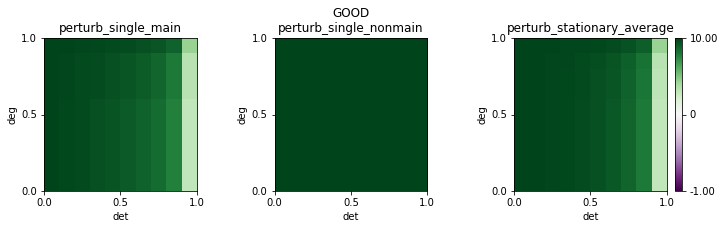

In [91]:
which_measures = ['good']
which_results = ['perturb_single_main', 'perturb_single_nonmain', 'perturb_stationary_average']
scale = 'emergence'
no_labels = no_titles = False

analysis.plot_analysis_by_result_02(all_results, which_results=which_results, which_measures=which_measures,
                               scale=scale, no_titles=no_titles, no_labels=no_labels, colormap='PRGn',
                               colorbar_ceil=10, colsize=3.5, rowsize=3)

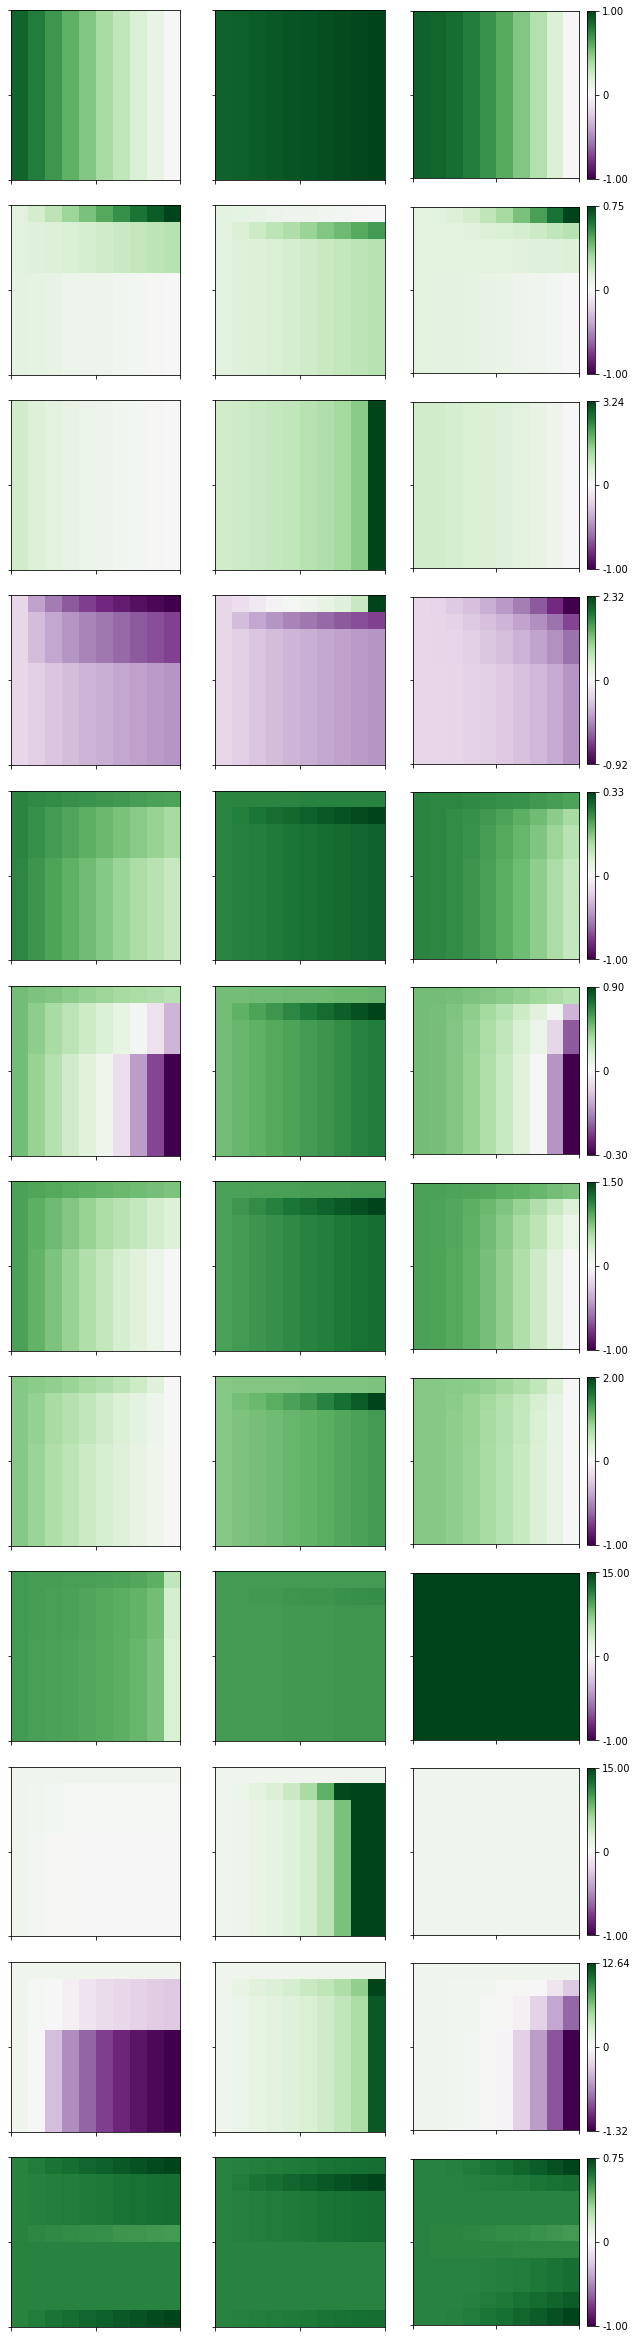

In [69]:

which_measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef'] + ['galton', 'suppes', 'eells', 'cheng', 'good', 'lewis_II_cpw', 'effect_ratio', 'bit_flip_transition',]

which_results = ['perturb_single_main', 'perturb_single_nonmain', 'perturb_stationary_average']

fig, axs = analysis.plot_analysis_by_result_02(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='emergence',transpose=True, no_titles=True, no_labels=True, colormap='PRGn')
plt.subplots_adjust(wspace=0.12, hspace=0.15)
# plt.savefig(Path.cwd()/f'docs/figures/fig4_causal_emergence_PRGn_perturb_stationary_average.eps')

## Visualize results

In [23]:
all_results.keys()

dict_keys(['maxent_single_main', 'maxent_single_nonmain', 'perturb_single_main', 'perturb_single_nonmain', 'stationary_single_main', 'stationary_single_nonmain', 'maxent_maxent_average', 'maxent_stationary_average', 'stationary_maxent_average', 'stationary_stationary_average', 'perturb_maxent_average', 'perturb_stationary_average', 'maxent_maxent_average_asy_0.7', 'stationary_stationary_average_asy_0.7'])

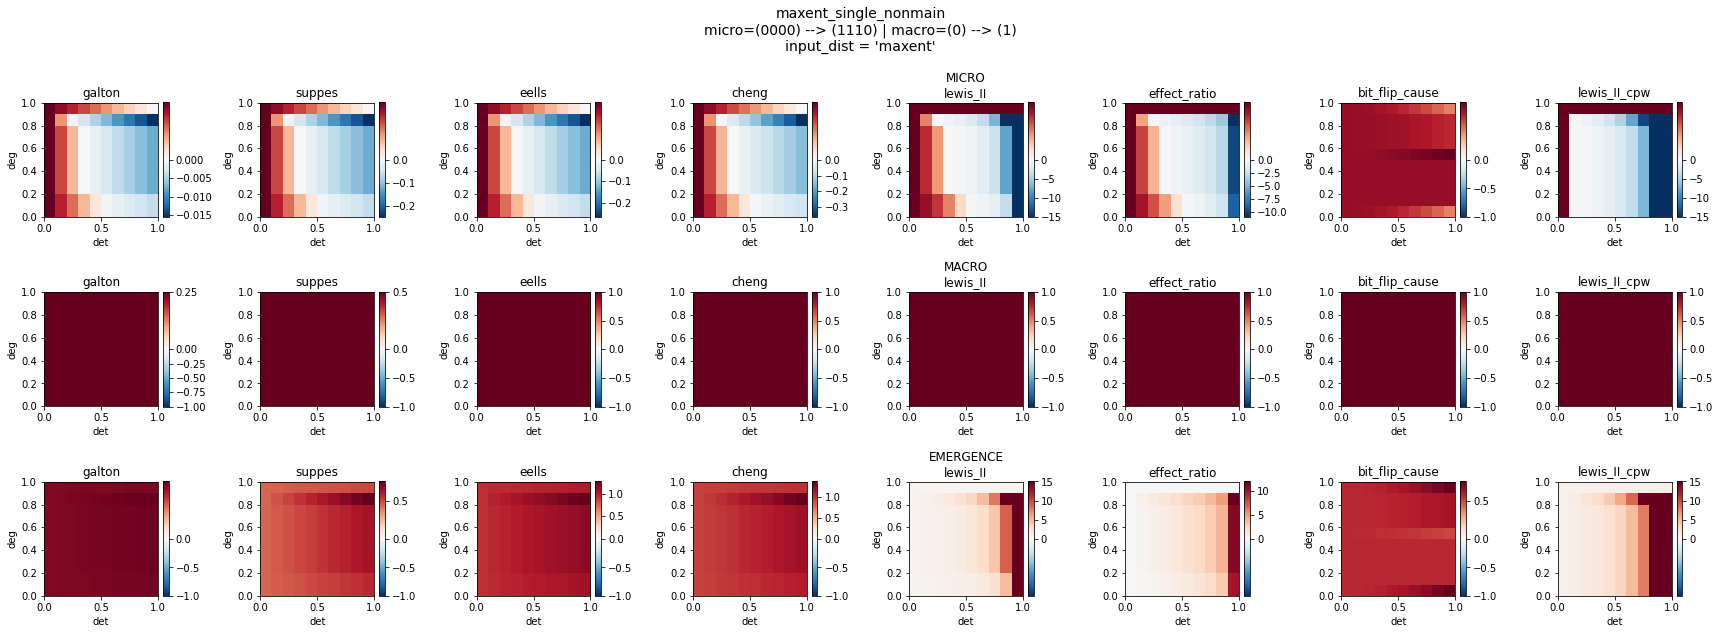

In [25]:
measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'lewis_II_cpw']

which_result = 'maxent_maxent_average'
which_result = 'maxent_single_nonmain'
result = all_results[which_result]

fig, axs = analysis.plot_analysis_by_scales_02(result, which_scales=['micro', 'macro', 'emergence'], which_measures=measures)
s1 = f"{which_result}\nmicro=({micro_transition[0]}) --> ({micro_transition[1]}) | macro=({macro_transition[0]}) --> ({macro_transition[1]})"
s2 = f"input_dist = '{which_input_dist}'"
suptitle = "\n".join([s1, s2])
fig.suptitle(suptitle, fontsize=14);
plt.subplots_adjust(top=0.85)
# plt.savefig(Path.cwd()/f'figures/causal_primitives_inputdist_{which_input_dist}_single_main.png', dpi=200)

In [ ]:
measures = ['sufficiency', 'necessity', 'point_det_coef', 'point_deg_coef']

# SINGLE TRANSITION
fig, axs = analysis.plot_analysis_01_02(results_01, which_scales=['micro', 'macro', 'emergence'], which_measures=measures)
s1 = f"Single transition\nmicro=({micro_transition[0]}) --> ({micro_transition[1]}) | macro=({macro_transition[0]}) --> ({macro_transition[1]})"
s2 = f"cause_purview = '{which_cause_purview}', input_dist = '{which_input_dist}'"
suptitle = "\n".join([s1, s2])
fig.suptitle(suptitle, fontsize=14);
plt.subplots_adjust(top=0.85)
# plt.savefig(Path.cwd()/f'figures/causal_primitives_inputdist_{which_input_dist}_single_main.png', dpi=200)

2022-05-25 10:42:56,581 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,583 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,584 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,589 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,589 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,590 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,595 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,596 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,598 [matplotlib.text] WARNING MainProcess: posx and posy should be finite values
2022-05-25 10:42:56,604 [matplotlib.text] WARNING MainProcess: posx and posy should be fini

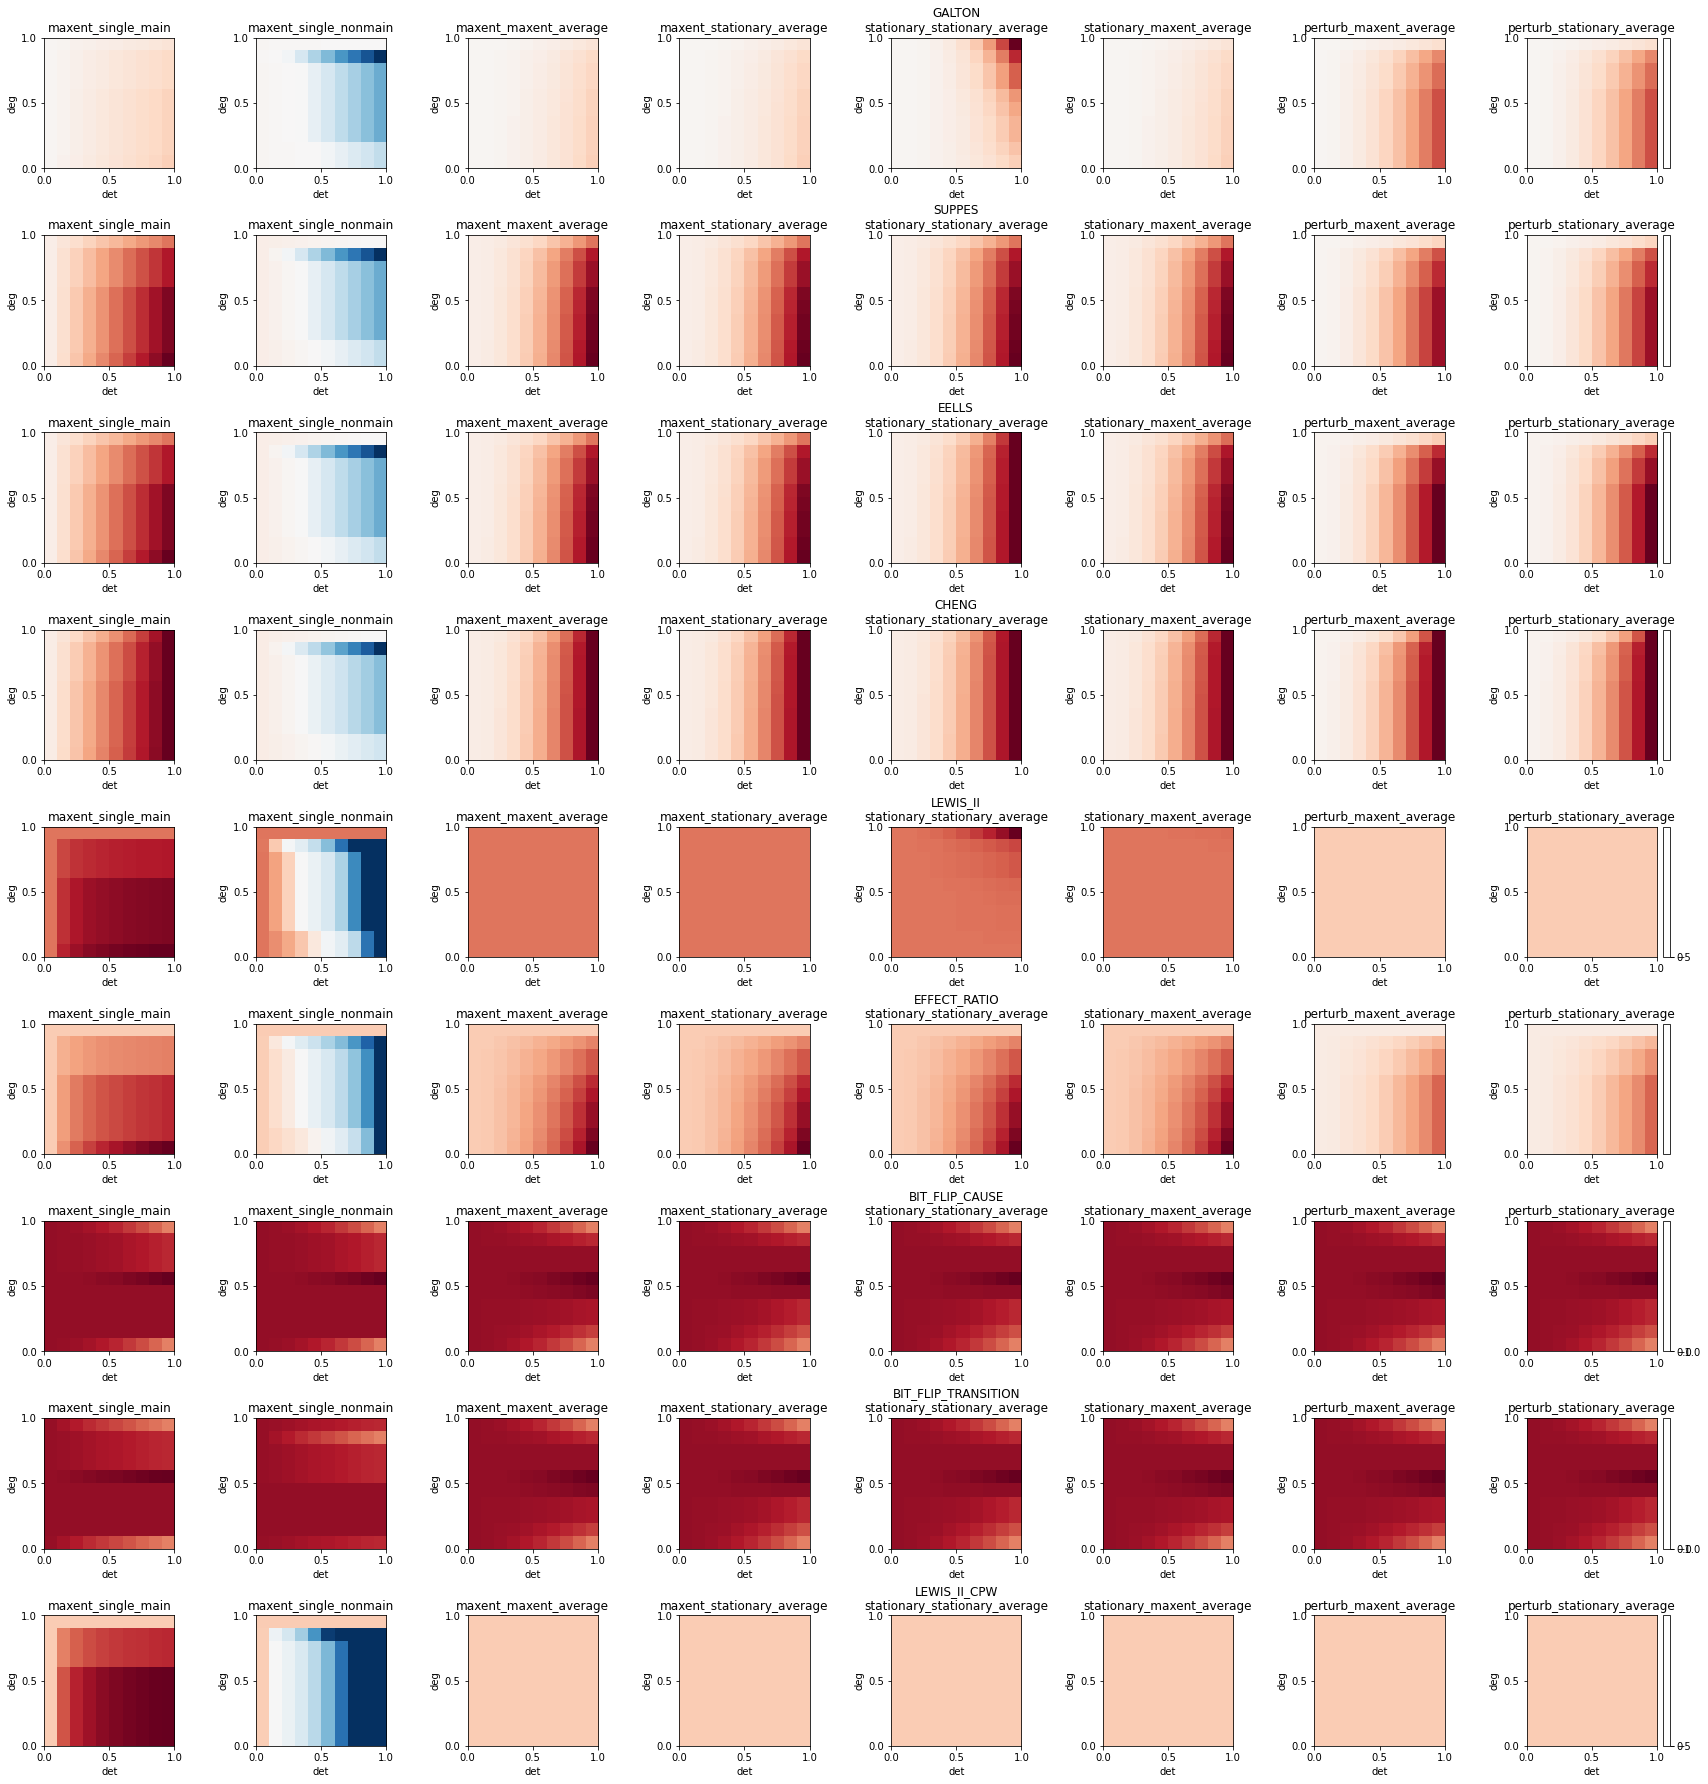

In [26]:
which_measures = ['galton', 'suppes', 'eells', 'cheng', 'lewis_II', 'effect_ratio', 'bit_flip_cause', 'bit_flip_transition', 'lewis_II_cpw']

which_results = ['maxent_single_main', 'maxent_single_nonmain', 'maxent_maxent_average',  'maxent_stationary_average', 'stationary_stationary_average', 'stationary_maxent_average', 'perturb_maxent_average', 'perturb_stationary_average']

fig, axs = analysis.plot_analysis_by_result_02(all_results, which_results=which_results, which_measures=which_measures,
                                            scale='micro',transpose=True, no_titles=False, no_labels=False, colormap='RdBu_r')
# plt.subplots_adjust(wspace=0.12, hspace=0.15)
# plt.savefig(Path.cwd()/f'docs/figures/fig3_causal_measures_RdBu.eps')

# Paper Figures

In [4]:
analysis.plot_analysis_01(all_results, 'paper_figures', no_labels=False, save_fig=False);

AttributeError: module 'analysis' has no attribute 'plot_analysis_01'

## Figure 1

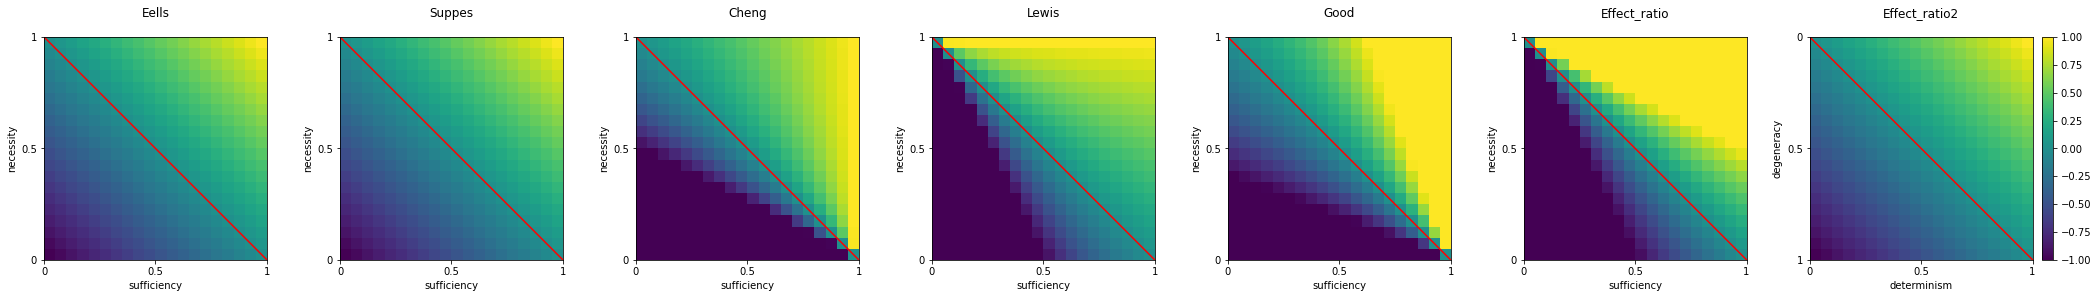

In [24]:
analysis.run_and_plot_analysis_03()

## Figure S2, 5, 6 & S3

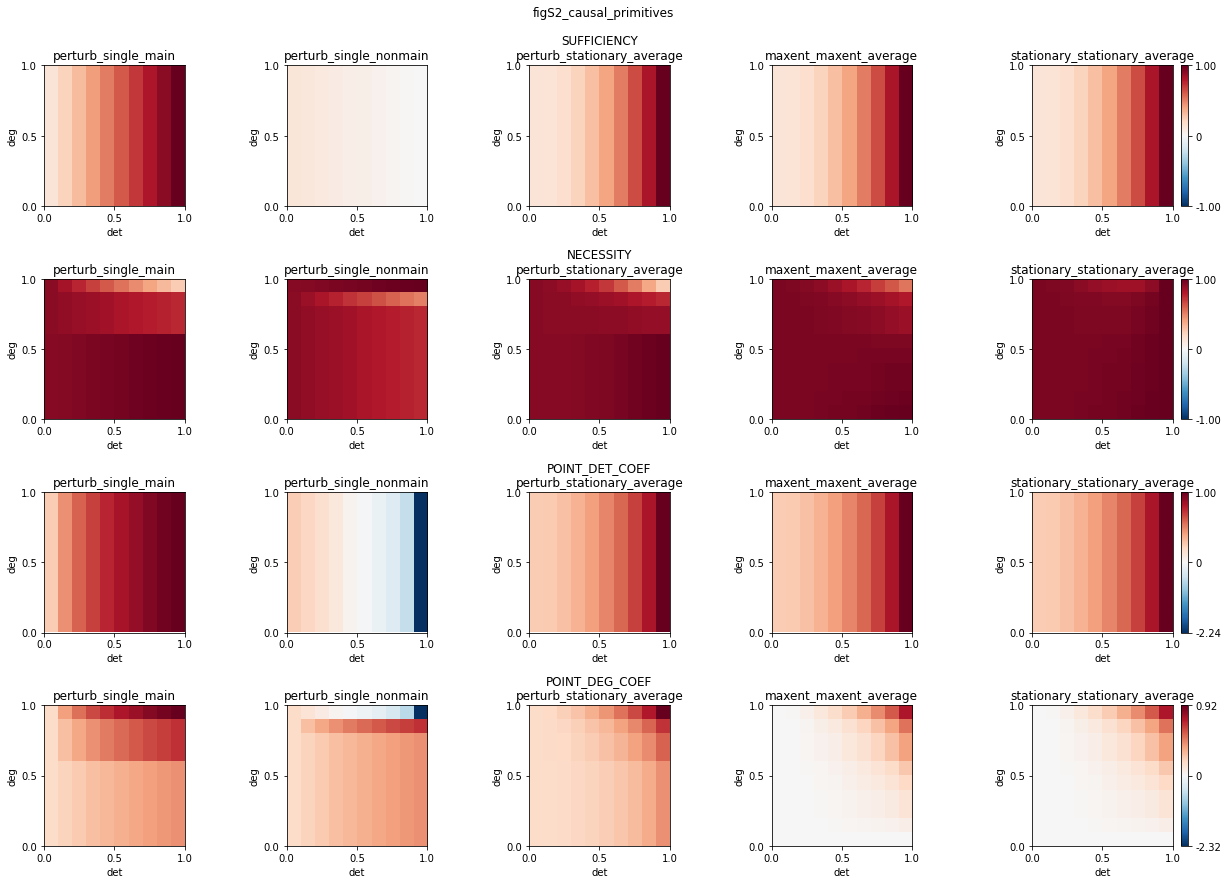

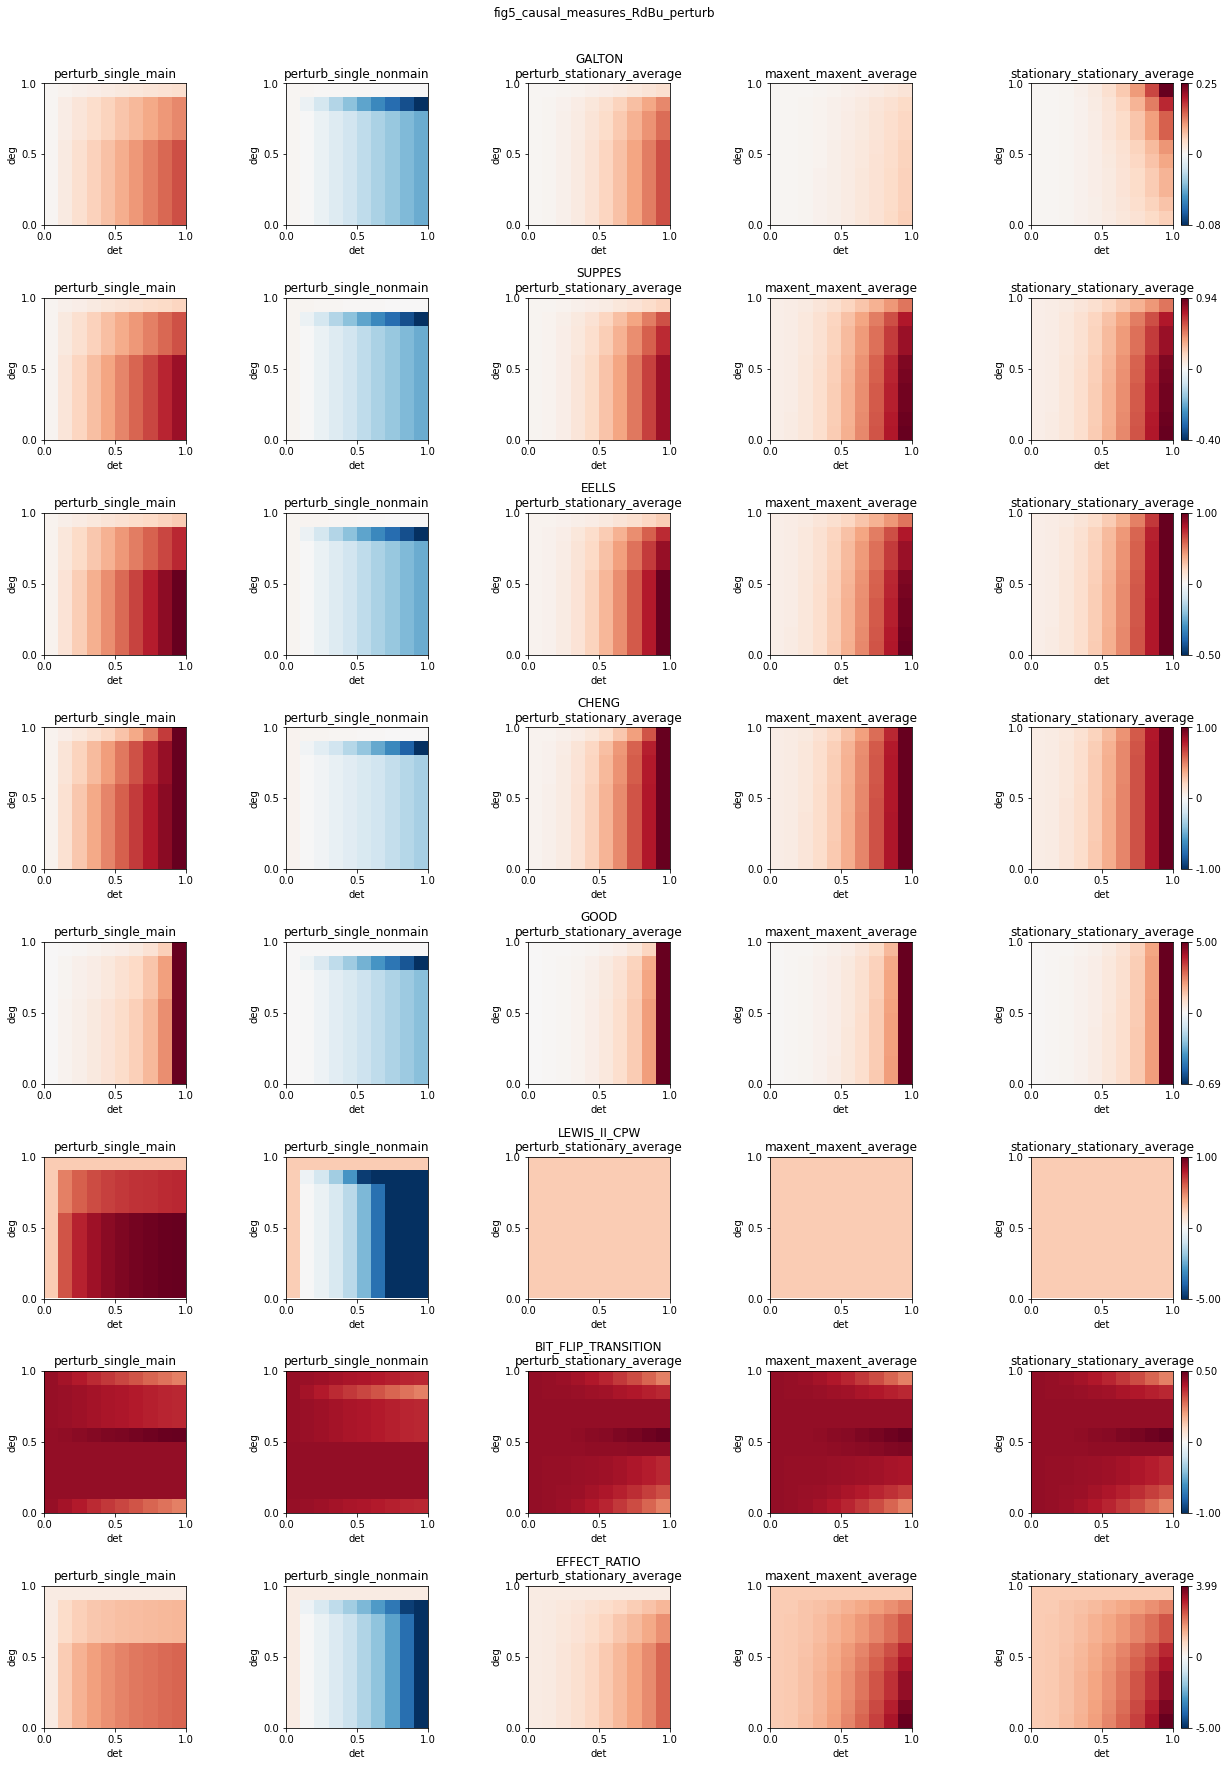

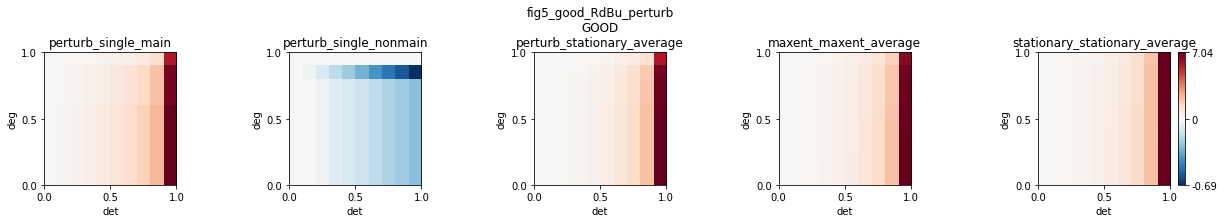

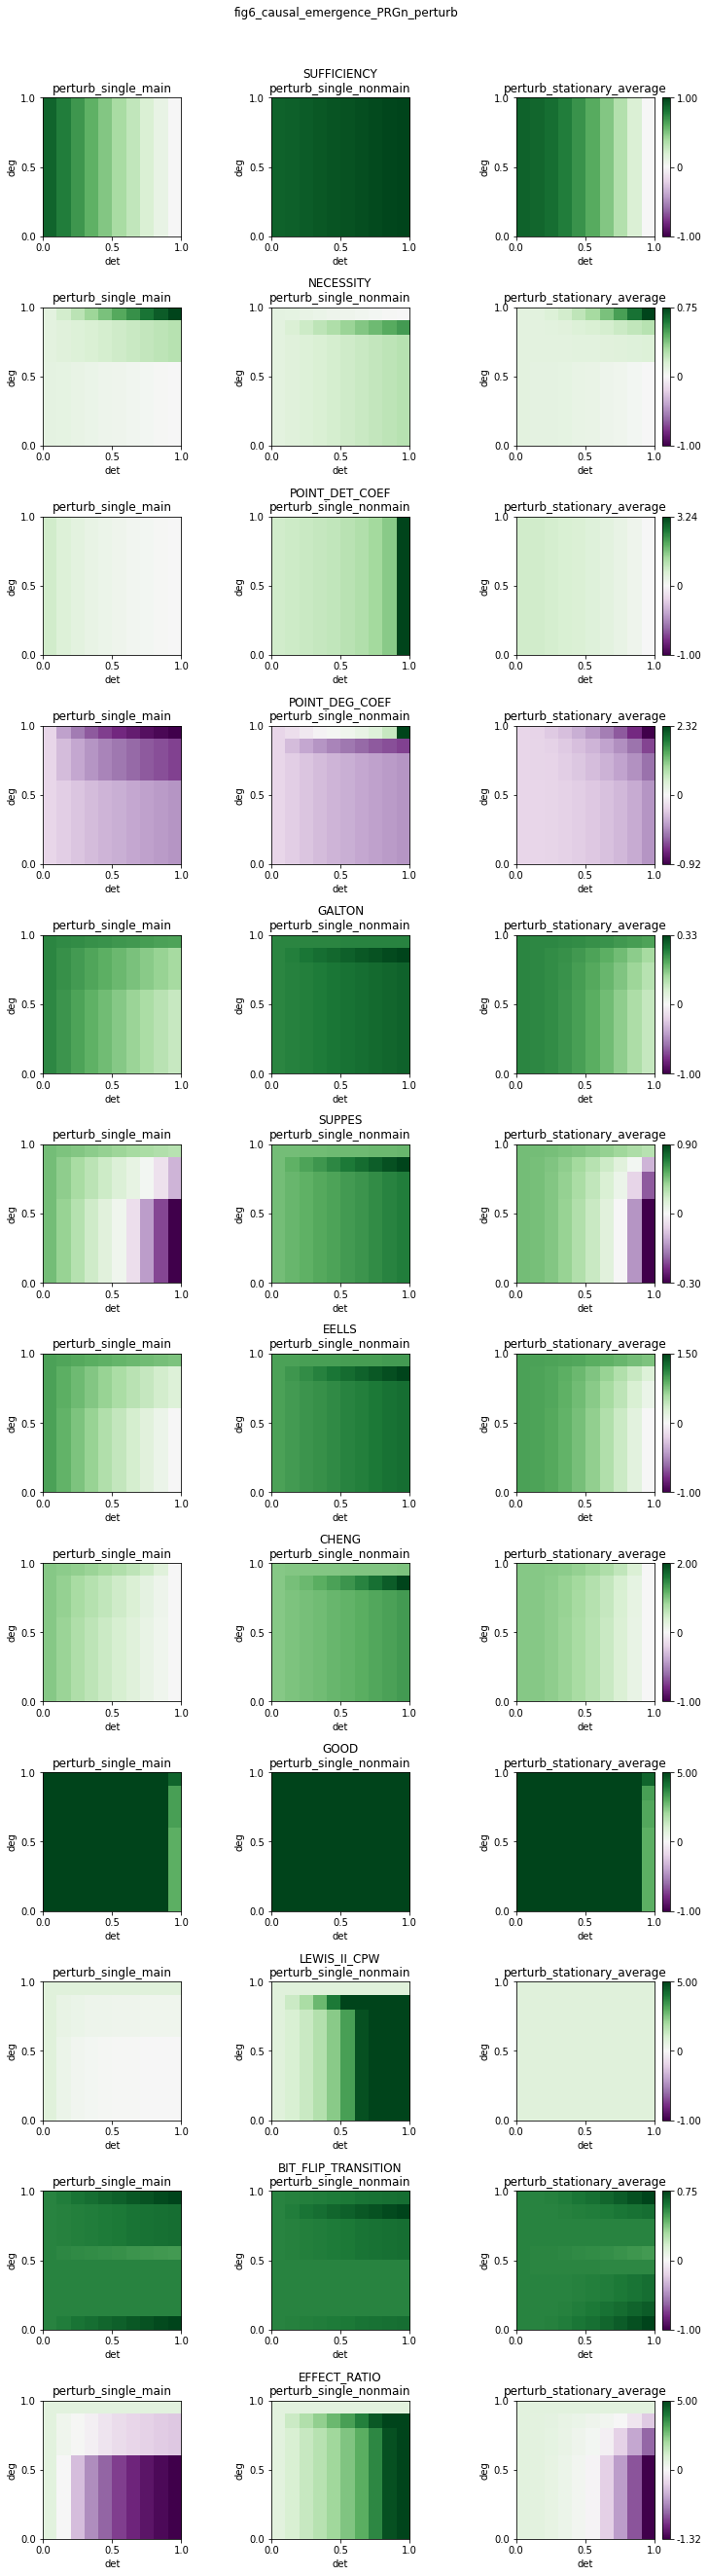

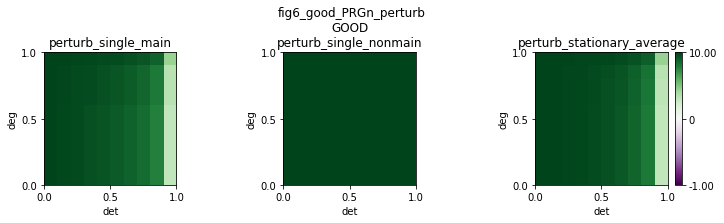

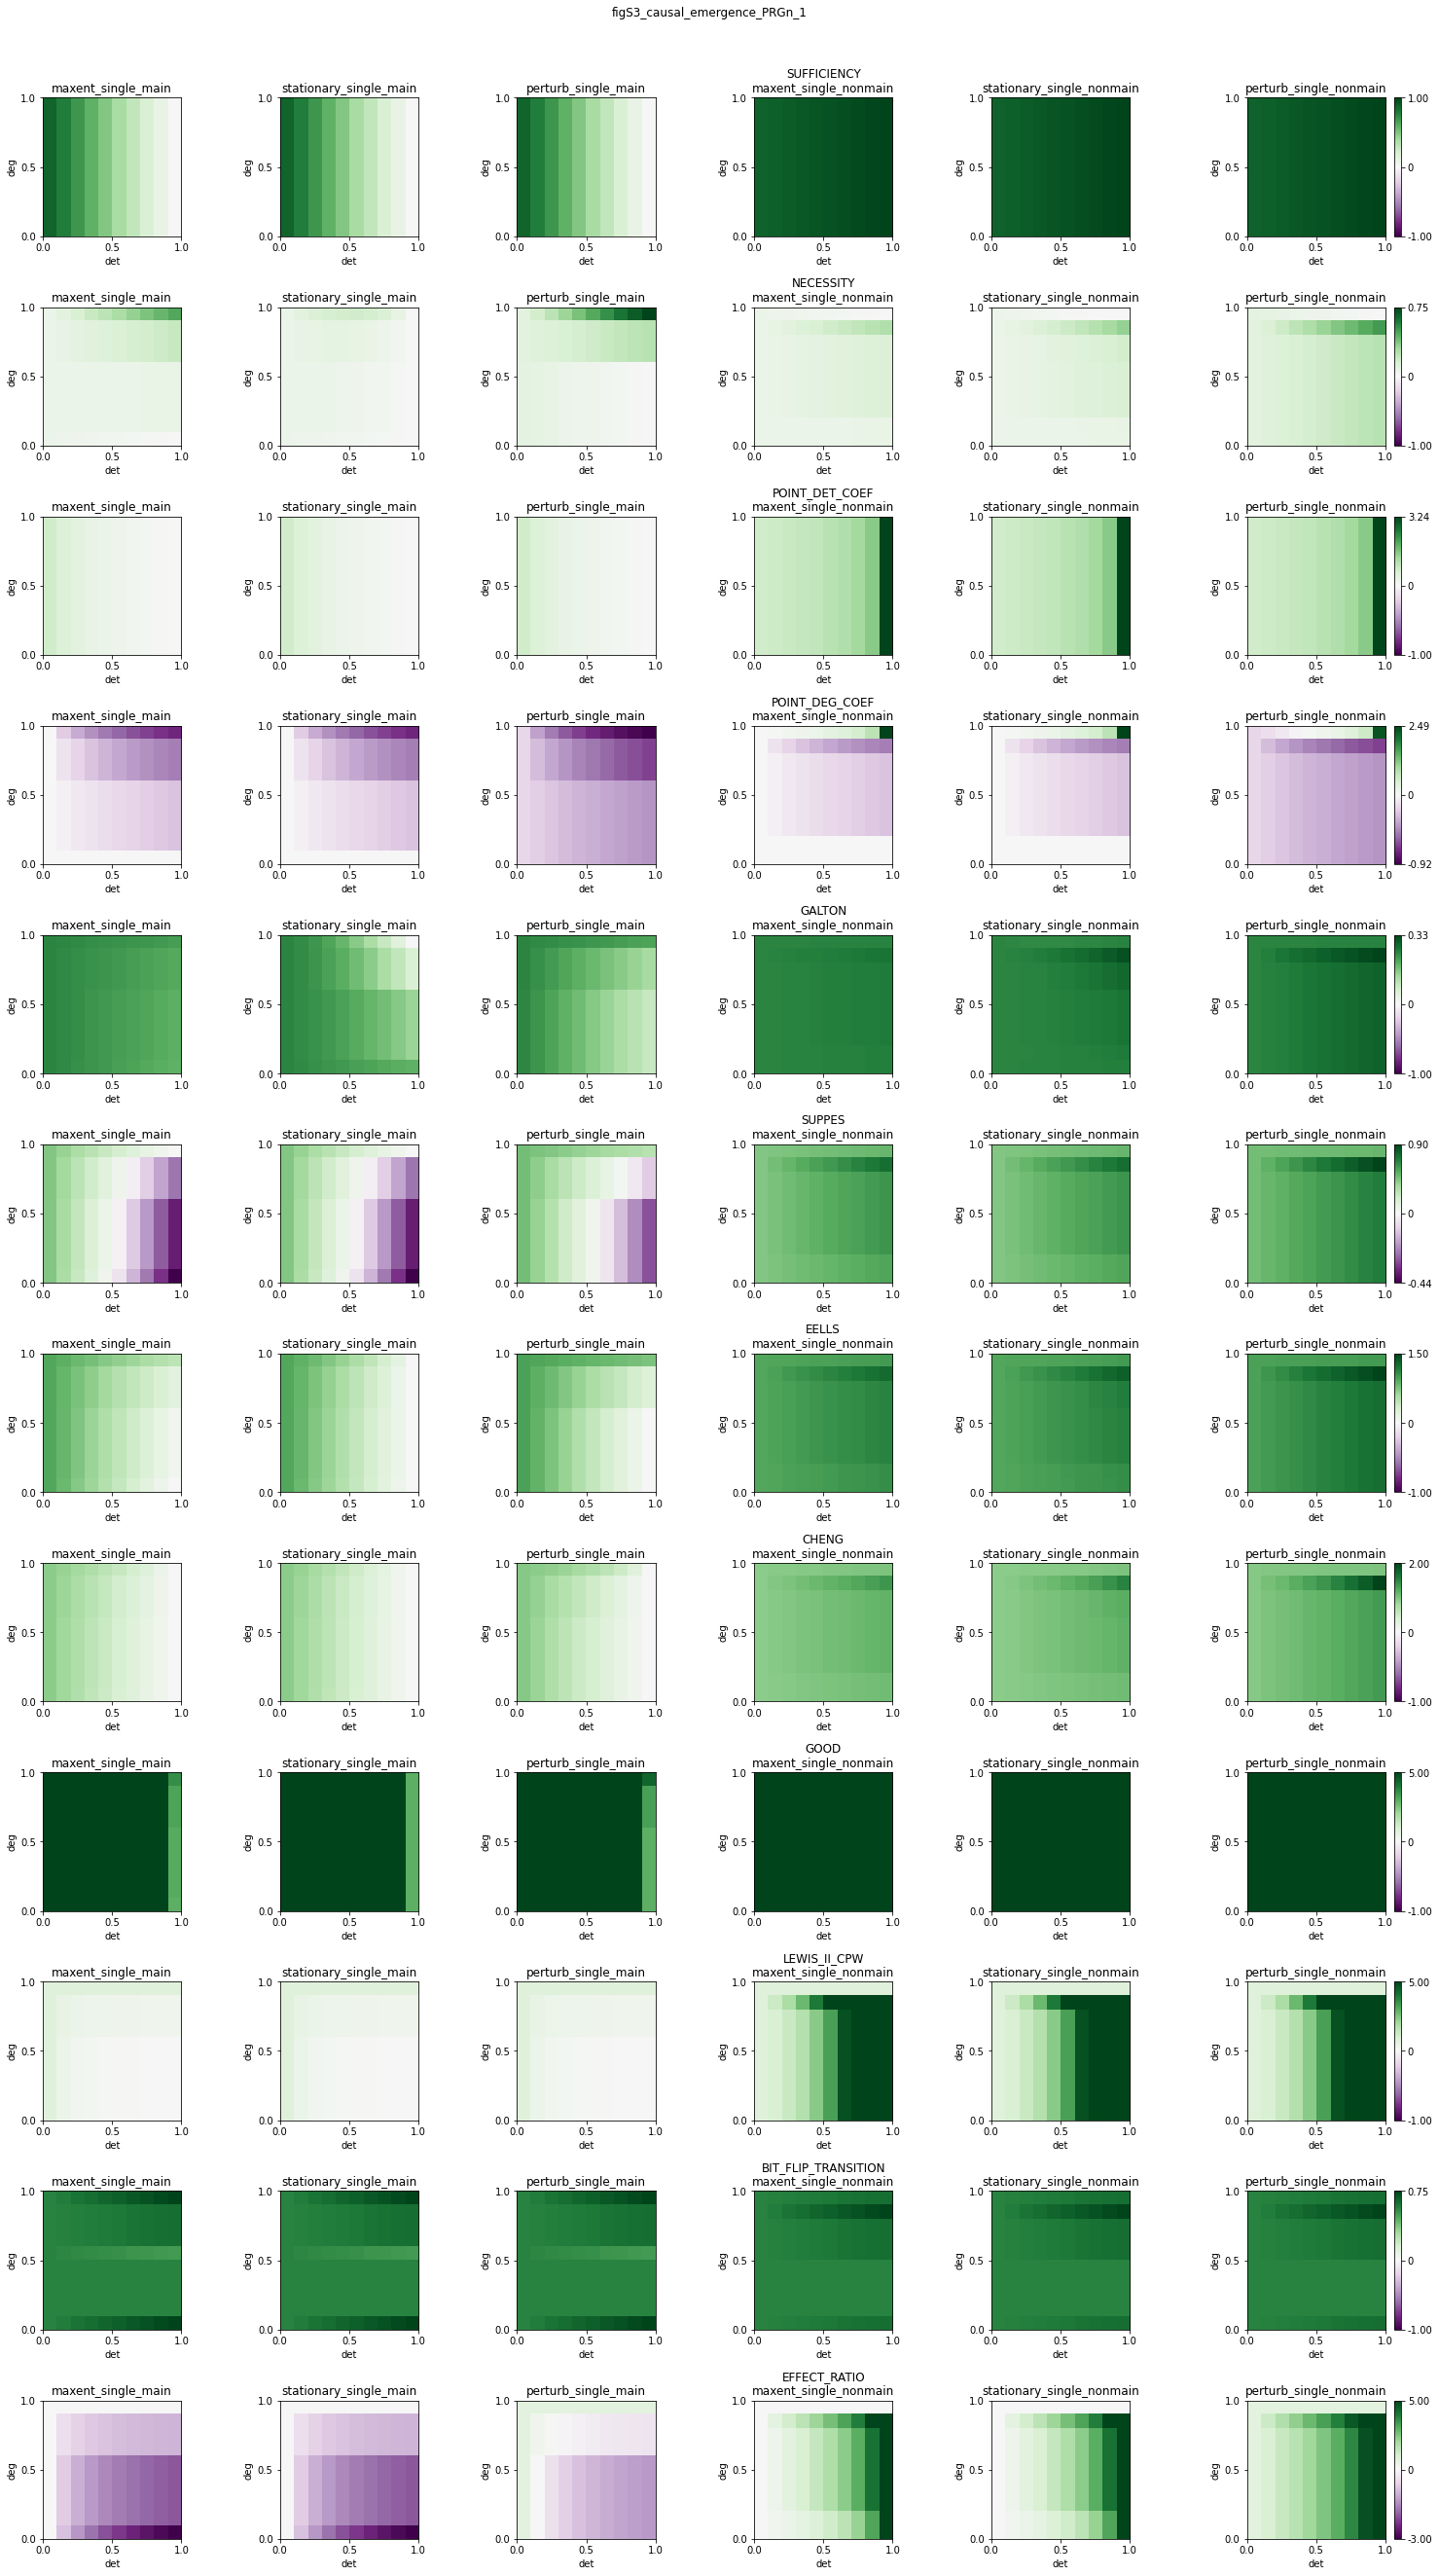

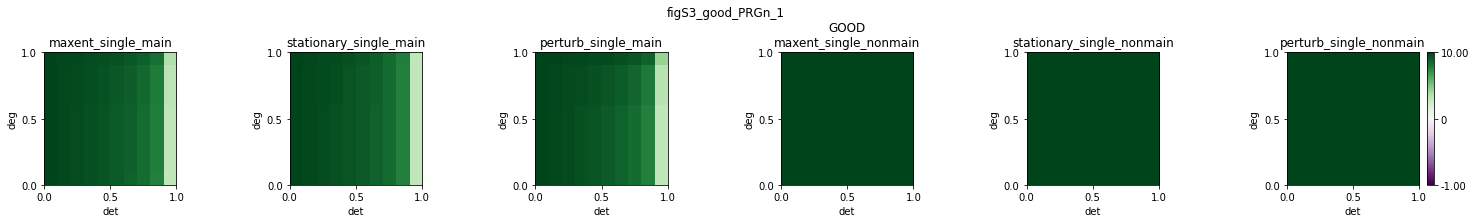

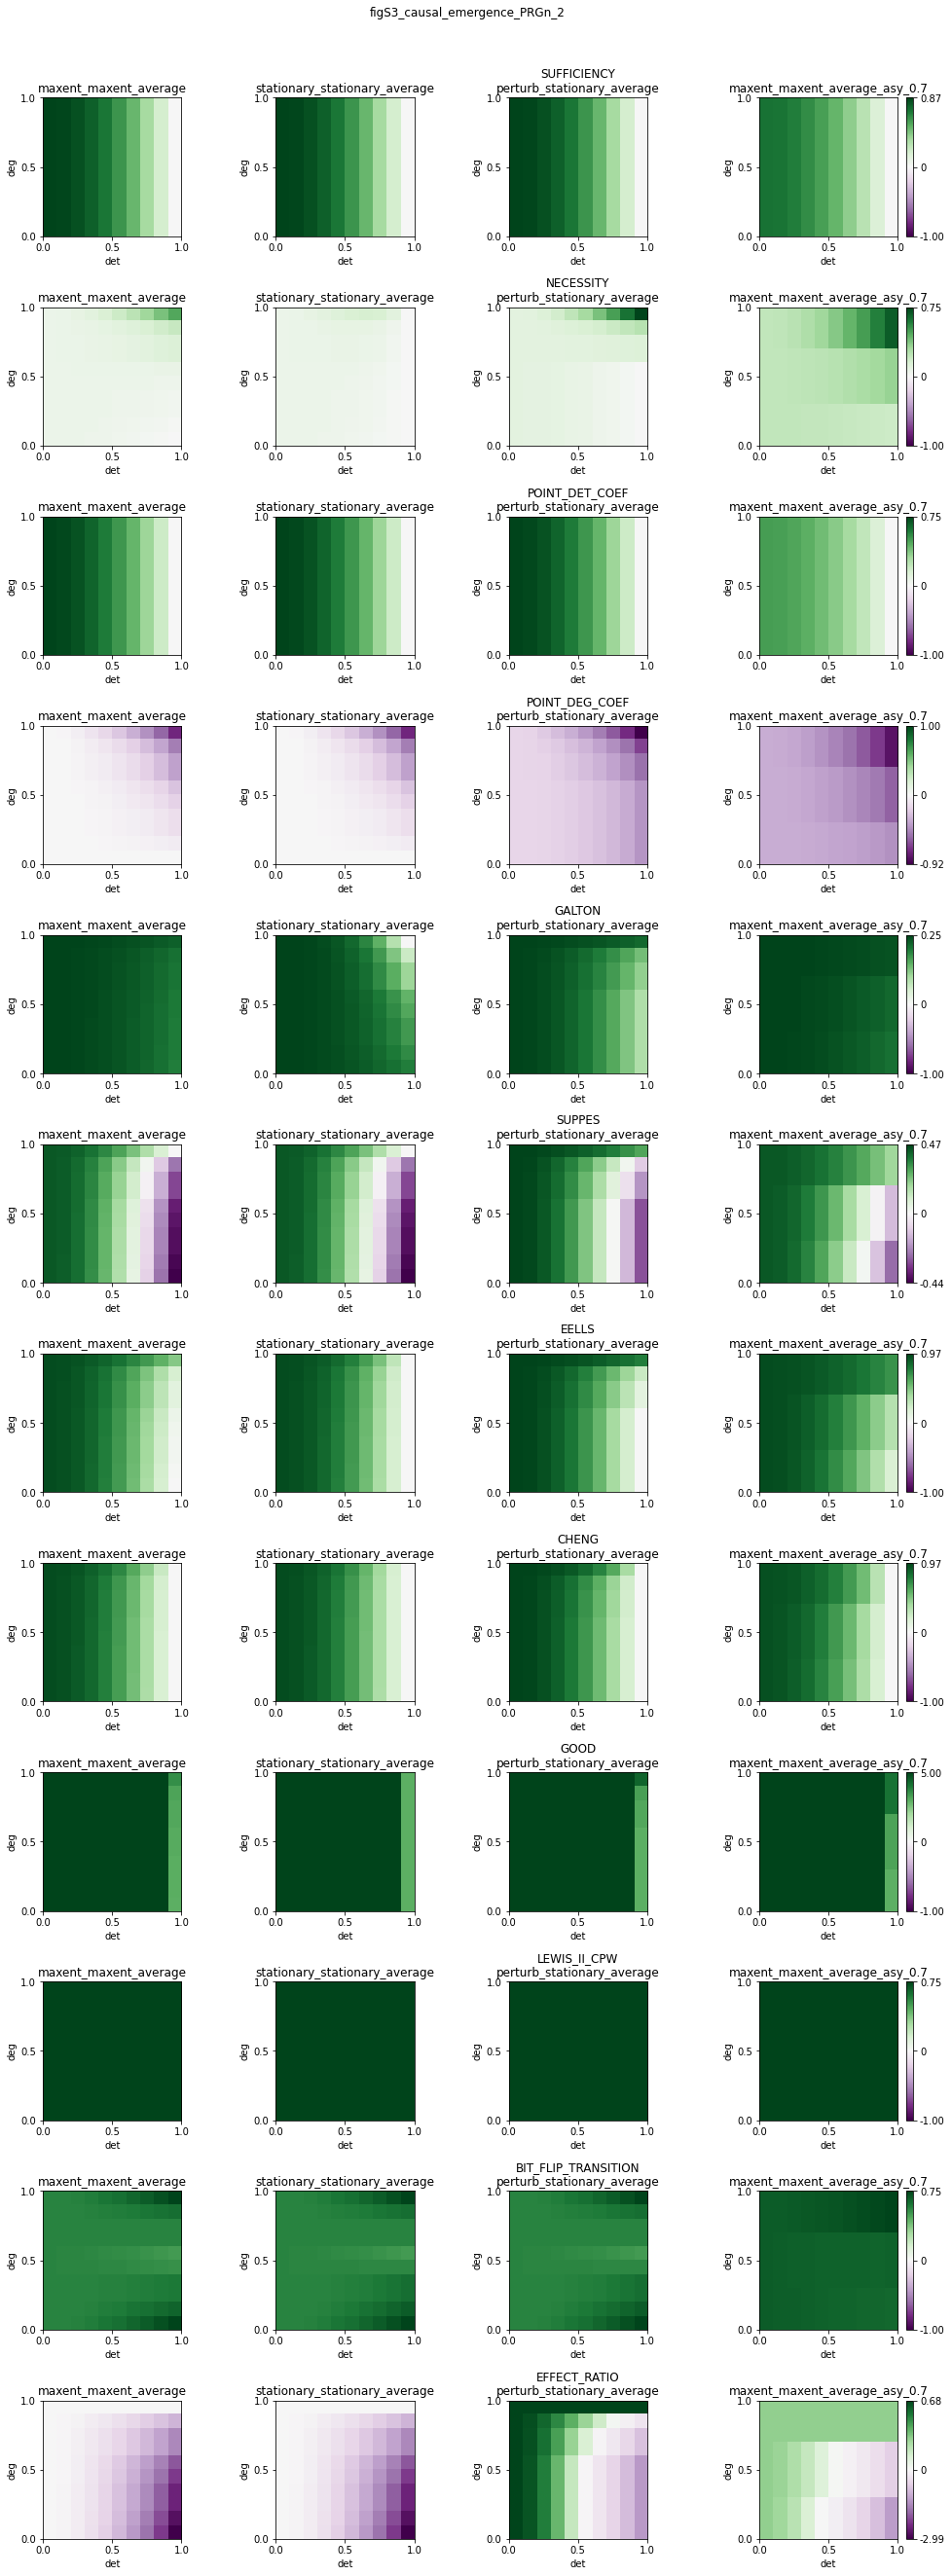

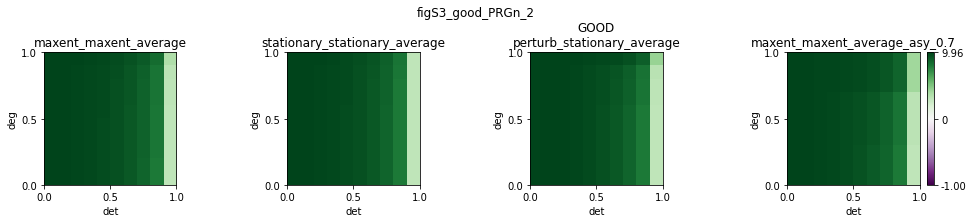

In [13]:
analysis.plot_analysis_02(all_results, 'paper_figures', no_labels=False, save_fig=False);

## Figure 7

In [27]:
FIGURE_DIR

NameError: name 'FIGURE_DIR' is not defined

PERTURB_STATIONARY_AVERAGE
GALTON [min, max]
[0.09, 0.24] (before norm)
[0.37, 1.00] (after norm)
SUPPES [min, max]
[-0.30, 0.47] (before norm)
[-0.63, 1.00] (after norm)
EELLS [min, max]
[0.00, 0.97] (before norm)
[0.00, 1.00] (after norm)
CHENG [min, max]
[0.00, 0.97] (before norm)
[0.00, 1.00] (after norm)
GOOD [min, max]
[2.97, 9.96] (before norm)
[0.30, 1.00] (after norm)
EFFECT_RATIO [min, max]
[-1.32, 0.68] (before norm)
[-1.00, 0.52] (after norm)
BIT_FLIP_TRANSITION [min, max]
[0.50, 0.75] (before norm)
[0.67, 1.00] (after norm)
LEWIS_II_CPW [min, max]
[0.75, 0.75] (before norm)
[1.00, 1.00] (after norm)
SUPER AVERAGE
[0.09, 0.91] (before norm)


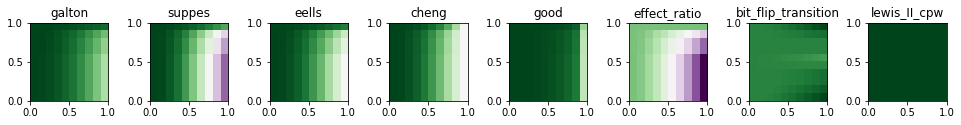

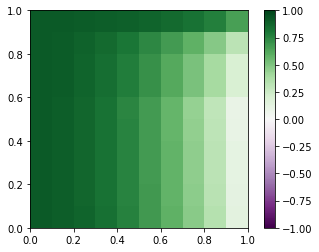

In [28]:
analysis.plot_analysis_04(all_results, save_fig=True, save_dir='')